the purpose of this code is to create venn diagram of muber of common and unique IDs from plasmid and workflow output. 1st venn diagram represent the common and unique geneIDs from Legacy workflow and Bactopia. secon Venn diagram is the common and unique plasmid IDS from Legacy workflow and Bactopia output. then quick sanity check to make sure that venn diagram is correct, at last we are also printiung out all unique IDs from both of the venn diagram.

In [57]:
!pip install matplotlib-venn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


get all the require packages 

In [58]:
import re
import pandas as pd
import numpy as np
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
dataset = pd.read_excel("Dataset.xlsx") # read excel file as .xlsx
dataset

,Sample ID,GenBank ID,BioSample ID,Long-read SRA ID
0,2014AM-1331,"CP093126,CP093127,CP093128",SAMN05596322,SRR19768540
1,2014AM-2067,"CP093122,CP093123,CP093124,CP093125",SAMN05596277,SRR19768539
2,2015AM-0414,"CP093120,CP093121",SAMN07268462,SRR19768530
3,2015AM-0511,"CP093140,CP093141,CP093142,CP093143,CP093144,C...",SAMN07415498,SRR19768529
4,2016AM-0673,"CP093116,CP093117,CP093118,CP093119",SAMN13512702,SRR19768528
5,2016K-0377,"CP093076,CP093077,CP093078,CP093079,CP093080",SAMN05250424,SRR19768533
6,2017AM-0493,"CP093109,CP093110,CP093111",SAMN17129770,SRR19768526
7,2021K-0017,CP093072,SAMN17478013,SRR19768531
8,PNUSAS002131,"CP093112,CP093113,CP093114,CP093115",SAMN04961841,SRR19768527
9,PNUSAS018090,"CP093096,CP093097,CP093098,CP093099,CP093100,C...",SAMN07427456,SRR19768524


In [60]:
final_table = pd.read_excel("banchmarkinglatestFinal.xlsx") # read the final table as .xlsx
final_table = final_table.drop('Unnamed: 0', axis=1) # reset index
final_table

,Sample ID,Gene_ID Workflow,Gene_Id Bactopia,Common Genes,Missing From Workflow (Gene),Missing From Bactopia,Plasmid_ID Bactopia,Plasmid_ID workFlow,common Plasmid IDs,Missing_Ids From Bactopia (Plasmid),Missing_IDs From Workflow (Plasmid)
0,2014AM-2067,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A)","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",NaN,"ColE1,Col156",NaN,"Col156,ColE1,",NaN
1,2015AM-0414,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","tet(A),aph(6)-Id,aph(3'')-Ib","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",Col156,Col156,"Col156,",NaN,NaN
2,2015AM-0511,"aph(3'')-Ib,aph(6)-Id,blaTEM-1C,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A),blaTEM-1","aph(3)-Ib, tet(A), aph(6)-Id","blaTEM,1,","blaTEM,1C,parC,T57S,","Col156,Col440I,Col440II,ColpVC","Col440II,Col(pHAD28),Col156,ColE1,ColE1,ColpVC","ColpVC,Col156,Col440II,","Col,pHAD28,ColE1,","Col440I,"
3,2016AM-0673,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","tet(A),aph(6)-Id,aph(3'')-Ib","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",NaN,NaN,NaN,NaN,NaN
4,2016AM-3354,"gyrA(D87N),mcr-1.1","gyrA(D87N),mcr-1.1","gyrA(D87N), mcr-1.1",NaN,NaN,"IncFIB(S),IncFII(S),IncX4","IncX4,IncFII(S),IncFIB(S)","IncX4,IncFIB,S,IncFII,S,",NaN,NaN
5,2016K-0377,parC(T57S),NaN,NaN,NaN,"parC,T57S,","Col156,Col440I,ColpVC,IncX1","IncX1,Col156,Col(pHAD28),ColpVC","ColpVC,IncX1,Col156,","Col,pHAD28,","Col440I,"
6,2017AM-0493,parC(T57S),NaN,NaN,NaN,"parC,T57S,",ColRNAI,ColE1,NaN,"ColE1,","ColRNAI,"
7,2021K-0017,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A)","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",NaN,NaN,NaN,NaN,NaN
8,PNUSAS002131,parC(T57S),NaN,NaN,NaN,"parC,T57S,","Col8282,IncI1,IncX1","IncI1-I(gamma),IncX1,Col8282","IncX1,Col8282,","IncI1,I,gamma,","IncI1,"
9,PNUSAS003019,parC(T57S),NaN,NaN,NaN,"parC,T57S,",NaN,NaN,NaN,NaN,NaN


In [61]:
finalDataset = pd.merge(dataset,final_table, on='Sample ID', how='outer') # merge both excel sheet based on the common column 
finalDataset

,Sample ID,GenBank ID,BioSample ID,Long-read SRA ID,Gene_ID Workflow,Gene_Id Bactopia,Common Genes,Missing From Workflow (Gene),Missing From Bactopia,Plasmid_ID Bactopia,Plasmid_ID workFlow,common Plasmid IDs,Missing_Ids From Bactopia (Plasmid),Missing_IDs From Workflow (Plasmid)
0,2014AM-1331,"CP093126,CP093127,CP093128",SAMN05596322,SRR19768540,NaN,"aph(3'')-Ib,aph(6)-Id,tet(A)",NaN,",aph,3,Ib,tet,A,aph,6,Id,",NaN,NaN,NaN,NaN,NaN,NaN
1,2014AM-2067,"CP093122,CP093123,CP093124,CP093125",SAMN05596277,SRR19768539,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A)","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",NaN,"ColE1,Col156",NaN,"Col156,ColE1,",NaN
2,2015AM-0414,"CP093120,CP093121",SAMN07268462,SRR19768530,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","tet(A),aph(6)-Id,aph(3'')-Ib","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",Col156,Col156,"Col156,",NaN,NaN
3,2015AM-0511,"CP093140,CP093141,CP093142,CP093143,CP093144,C...",SAMN07415498,SRR19768529,"aph(3'')-Ib,aph(6)-Id,blaTEM-1C,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A),blaTEM-1","aph(3)-Ib, tet(A), aph(6)-Id","blaTEM,1,","blaTEM,1C,parC,T57S,","Col156,Col440I,Col440II,ColpVC","Col440II,Col(pHAD28),Col156,ColE1,ColE1,ColpVC","ColpVC,Col156,Col440II,","Col,pHAD28,ColE1,","Col440I,"
4,2016AM-0673,"CP093116,CP093117,CP093118,CP093119",SAMN13512702,SRR19768528,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","tet(A),aph(6)-Id,aph(3'')-Ib","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",NaN,NaN,NaN,NaN,NaN
5,2016K-0377,"CP093076,CP093077,CP093078,CP093079,CP093080",SAMN05250424,SRR19768533,parC(T57S),NaN,NaN,NaN,"parC,T57S,","Col156,Col440I,ColpVC,IncX1","IncX1,Col156,Col(pHAD28),ColpVC","ColpVC,IncX1,Col156,","Col,pHAD28,","Col440I,"
6,2017AM-0493,"CP093109,CP093110,CP093111",SAMN17129770,SRR19768526,parC(T57S),NaN,NaN,NaN,"parC,T57S,",ColRNAI,ColE1,NaN,"ColE1,","ColRNAI,"
7,2021K-0017,CP093072,SAMN17478013,SRR19768531,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A)","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",NaN,NaN,NaN,NaN,NaN
8,PNUSAS002131,"CP093112,CP093113,CP093114,CP093115",SAMN04961841,SRR19768527,parC(T57S),NaN,NaN,NaN,"parC,T57S,","Col8282,IncI1,IncX1","IncI1-I(gamma),IncX1,Col8282","IncX1,Col8282,","IncI1,I,gamma,","IncI1,"
9,PNUSAS018090,"CP093096,CP093097,CP093098,CP093099,CP093100,C...",SAMN07427456,SRR19768524,parC(T57S),NaN,NaN,NaN,"parC,T57S,","Col156,Col440I,ColpVC,IncX1","IncX1,Col(pHAD28),Col156,ColpVC","ColpVC,IncX1,Col156,","Col,pHAD28,","Col440I,"


In [62]:
finalDataset['common Plasmid IDs'] = finalDataset['common Plasmid IDs'].str.rstrip(',')
finalDataset

,Sample ID,GenBank ID,BioSample ID,Long-read SRA ID,Gene_ID Workflow,Gene_Id Bactopia,Common Genes,Missing From Workflow (Gene),Missing From Bactopia,Plasmid_ID Bactopia,Plasmid_ID workFlow,common Plasmid IDs,Missing_Ids From Bactopia (Plasmid),Missing_IDs From Workflow (Plasmid)
0,2014AM-1331,"CP093126,CP093127,CP093128",SAMN05596322,SRR19768540,NaN,"aph(3'')-Ib,aph(6)-Id,tet(A)",NaN,",aph,3,Ib,tet,A,aph,6,Id,",NaN,NaN,NaN,NaN,NaN,NaN
1,2014AM-2067,"CP093122,CP093123,CP093124,CP093125",SAMN05596277,SRR19768539,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A)","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",NaN,"ColE1,Col156",NaN,"Col156,ColE1,",NaN
2,2015AM-0414,"CP093120,CP093121",SAMN07268462,SRR19768530,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","tet(A),aph(6)-Id,aph(3'')-Ib","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",Col156,Col156,Col156,NaN,NaN
3,2015AM-0511,"CP093140,CP093141,CP093142,CP093143,CP093144,C...",SAMN07415498,SRR19768529,"aph(3'')-Ib,aph(6)-Id,blaTEM-1C,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A),blaTEM-1","aph(3)-Ib, tet(A), aph(6)-Id","blaTEM,1,","blaTEM,1C,parC,T57S,","Col156,Col440I,Col440II,ColpVC","Col440II,Col(pHAD28),Col156,ColE1,ColE1,ColpVC","ColpVC,Col156,Col440II","Col,pHAD28,ColE1,","Col440I,"
4,2016AM-0673,"CP093116,CP093117,CP093118,CP093119",SAMN13512702,SRR19768528,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","tet(A),aph(6)-Id,aph(3'')-Ib","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",NaN,NaN,NaN,NaN,NaN
5,2016K-0377,"CP093076,CP093077,CP093078,CP093079,CP093080",SAMN05250424,SRR19768533,parC(T57S),NaN,NaN,NaN,"parC,T57S,","Col156,Col440I,ColpVC,IncX1","IncX1,Col156,Col(pHAD28),ColpVC","ColpVC,IncX1,Col156","Col,pHAD28,","Col440I,"
6,2017AM-0493,"CP093109,CP093110,CP093111",SAMN17129770,SRR19768526,parC(T57S),NaN,NaN,NaN,"parC,T57S,",ColRNAI,ColE1,NaN,"ColE1,","ColRNAI,"
7,2021K-0017,CP093072,SAMN17478013,SRR19768531,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A)","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",NaN,NaN,NaN,NaN,NaN
8,PNUSAS002131,"CP093112,CP093113,CP093114,CP093115",SAMN04961841,SRR19768527,parC(T57S),NaN,NaN,NaN,"parC,T57S,","Col8282,IncI1,IncX1","IncI1-I(gamma),IncX1,Col8282","IncX1,Col8282","IncI1,I,gamma,","IncI1,"
9,PNUSAS018090,"CP093096,CP093097,CP093098,CP093099,CP093100,C...",SAMN07427456,SRR19768524,parC(T57S),NaN,NaN,NaN,"parC,T57S,","Col156,Col440I,ColpVC,IncX1","IncX1,Col(pHAD28),Col156,ColpVC","ColpVC,IncX1,Col156","Col,pHAD28,","Col440I,"


In [63]:
finalDataset = finalDataset.astype(str) # change the datatype to string
finalDataset

,Sample ID,GenBank ID,BioSample ID,Long-read SRA ID,Gene_ID Workflow,Gene_Id Bactopia,Common Genes,Missing From Workflow (Gene),Missing From Bactopia,Plasmid_ID Bactopia,Plasmid_ID workFlow,common Plasmid IDs,Missing_Ids From Bactopia (Plasmid),Missing_IDs From Workflow (Plasmid)
0,2014AM-1331,"CP093126,CP093127,CP093128",SAMN05596322,SRR19768540,nan,"aph(3'')-Ib,aph(6)-Id,tet(A)",nan,",aph,3,Ib,tet,A,aph,6,Id,",nan,nan,nan,nan,nan,nan
1,2014AM-2067,"CP093122,CP093123,CP093124,CP093125",SAMN05596277,SRR19768539,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A)","aph(3)-Ib, tet(A), aph(6)-Id",nan,"parC,T57S,",nan,"ColE1,Col156",nan,"Col156,ColE1,",nan
2,2015AM-0414,"CP093120,CP093121",SAMN07268462,SRR19768530,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","tet(A),aph(6)-Id,aph(3'')-Ib","aph(3)-Ib, tet(A), aph(6)-Id",nan,"parC,T57S,",Col156,Col156,Col156,nan,nan
3,2015AM-0511,"CP093140,CP093141,CP093142,CP093143,CP093144,C...",SAMN07415498,SRR19768529,"aph(3'')-Ib,aph(6)-Id,blaTEM-1C,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A),blaTEM-1","aph(3)-Ib, tet(A), aph(6)-Id","blaTEM,1,","blaTEM,1C,parC,T57S,","Col156,Col440I,Col440II,ColpVC","Col440II,Col(pHAD28),Col156,ColE1,ColE1,ColpVC","ColpVC,Col156,Col440II","Col,pHAD28,ColE1,","Col440I,"
4,2016AM-0673,"CP093116,CP093117,CP093118,CP093119",SAMN13512702,SRR19768528,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","tet(A),aph(6)-Id,aph(3'')-Ib","aph(3)-Ib, tet(A), aph(6)-Id",nan,"parC,T57S,",nan,nan,nan,nan,nan
5,2016K-0377,"CP093076,CP093077,CP093078,CP093079,CP093080",SAMN05250424,SRR19768533,parC(T57S),nan,nan,nan,"parC,T57S,","Col156,Col440I,ColpVC,IncX1","IncX1,Col156,Col(pHAD28),ColpVC","ColpVC,IncX1,Col156","Col,pHAD28,","Col440I,"
6,2017AM-0493,"CP093109,CP093110,CP093111",SAMN17129770,SRR19768526,parC(T57S),nan,nan,nan,"parC,T57S,",ColRNAI,ColE1,nan,"ColE1,","ColRNAI,"
7,2021K-0017,CP093072,SAMN17478013,SRR19768531,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A)","aph(3)-Ib, tet(A), aph(6)-Id",nan,"parC,T57S,",nan,nan,nan,nan,nan
8,PNUSAS002131,"CP093112,CP093113,CP093114,CP093115",SAMN04961841,SRR19768527,parC(T57S),nan,nan,nan,"parC,T57S,","Col8282,IncI1,IncX1","IncI1-I(gamma),IncX1,Col8282","IncX1,Col8282","IncI1,I,gamma,","IncI1,"
9,PNUSAS018090,"CP093096,CP093097,CP093098,CP093099,CP093100,C...",SAMN07427456,SRR19768524,parC(T57S),nan,nan,nan,"parC,T57S,","Col156,Col440I,ColpVC,IncX1","IncX1,Col(pHAD28),Col156,ColpVC","ColpVC,IncX1,Col156","Col,pHAD28,","Col440I,"


In [64]:
finalDataset.to_excel("finalDataset.xlsx")

excess each of the elemnt from  interested columns

In [65]:
finalDataset['Gene_ID Workflow'] = finalDataset['Gene_ID Workflow'].str.split(',')
finalDataset['Gene_Id Bactopia'] = finalDataset['Gene_Id Bactopia'].str.split(',')
finalDataset['Plasmid_ID Bactopia'] = finalDataset['Plasmid_ID Bactopia'].str.split(',')
finalDataset['Plasmid_ID  workFlow'] = finalDataset['Plasmid_ID  workFlow'].str.split(',')

set each of the unique elemnts from columns

In [66]:
set_A = set(finalDataset['Gene_ID Workflow'].explode().unique())
set_B = set(finalDataset['Gene_Id Bactopia'].explode().unique())
set_C = set(finalDataset['Plasmid_ID Bactopia'].explode().unique())
set_D = set(finalDataset['Plasmid_ID  workFlow'].explode().unique())

create venn diagram 

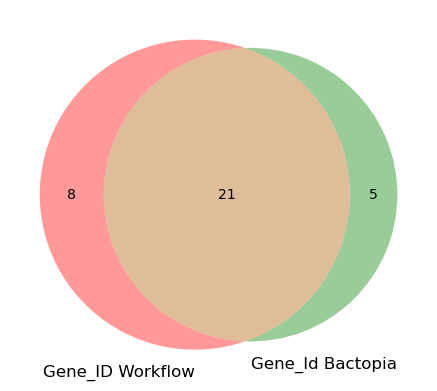

In [67]:
venn2([set_A, set_B], set_colors=('red','green'), set_labels=('Gene_ID Workflow','Gene_Id Bactopia'))

sanity chack to make sure if the venn diagram number is correct

In [68]:
total_unique = len(set_A.union(set_B))
total_common = len(set_A.intersection(set_B))
print(f"total unique values: {total_unique}")
print(f"total common values: {total_common}")

total unique values: 34
total common values: 21


In [69]:
uniqueGene_workflow = set_A - set_B # get the unique gene IDs from workflow
uniqueGene_workflow
                              

{'aac(3)-IV',
 "ant(3'')-Ia",
 'blaTEM-1B',
 'blaTEM-1C',
 'mcr-1.26',
 'parC(T57S)',
 'qacE',
 'qacH'}

In [70]:
uniqueGene_Bactopia = set_B - set_A # get unique gene IDs from Bactopia
uniqueGene_Bactopia

{'aac(3)-IVa', 'aadA1', 'blaTEM-1', 'qacEdelta1', 'qacL'}

create venn diagram of plasmid IDs

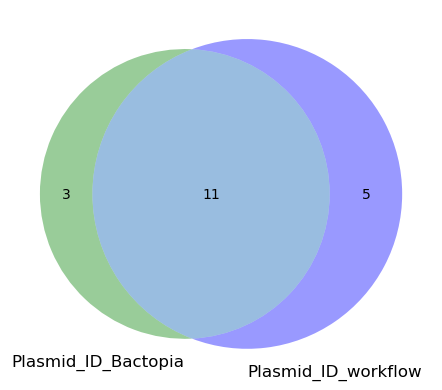

In [71]:
venn2([set_C, set_D], set_colors=('green','blue'), set_labels=('Plasmid_ID_Bactopia','Plasmid_ID_workflow'))

senity check of the venn diagram 

In [72]:
total_unique = len(set_C.union(set_D))
total_common = len(set_C.intersection(set_D))
print(f"total unique values: {total_unique}")
print(f"total common values: {total_common}")

total unique values: 19
total common values: 11


In [73]:
uniquesPlasmid_workflow = set_D - set_C # get unique plamid IDs from workflow
uniquesPlasmid_workflow

{'Col(pHAD28)', 'ColE1', 'IncFIB(pN55391)', 'IncI1-I(gamma)', 'IncI2(delta)'}

In [74]:
uniquePlasmid_bactopia = set_C - set_D # get unique plasmid IDS from Bactopia
uniquePlasmid_bactopia

{'ColRNAI', 'IncI1', 'IncI2'}